# LONG-TERM INVESTMENT PREDICTION

## INTRODUCTION
The Portuguese Bank has identified a revenue decline due to customers not making long-term deposits. The purpose of the model is to identify existing customers that have a higher chance to subscribe for a long term deposit and develop marketing campaigns to target them. The dataset i will be using is the Portuguese Bank dataset.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
The dataset contains train and test data. Features of train data are listed below

age  -  age of a person<br>
job - type of job  **('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')**<br>
marital - marital status **('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)**<br>
education - **('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')**<br>
default - if has credit in default **('no','yes','unknown')**<br>
housing - has housing loan **('no','yes','unknown')**<br>
loan - has personal loan **('no','yes','unknown')**<br>
contact - 	contact communication type **('cellular','telephone')**<br>
month - last contact month of year **('jan', 'feb', 'mar', …, 'nov', 'dec')**<br>
dayofweek - last contact day of the week **('mon','tue','wed','thu','fri')**<br>
duration - 	last contact duration, in seconds affects the output target **(e.g., if duration=0 then y='no')**<br>
campaign - number of contacts performed during this campaign and for this client<br>
pdays - number of days that passed by after the client was last contacted from a previous campaign **(999 means client was not previously contacted)**<br>
previous - number of contacts performed before this campaign and for this client<br>
poutcome - outcome of the previous marketing campaign **('failure','nonexistent','success')**<br>
deposite - has the client subscribed a term deposit? **('yes','no')**<br>


### IMPORT LIBRARIES

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import time
import warnings
warnings.filterwarnings('ignore')


In [134]:
# Building classification models
import sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [135]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### LOAD DATA

In [136]:
# Loads the train and test dataframes
df_train  = pd.read_csv('new_train.csv')
df_test = pd.read_csv('new_test.csv')

### EXPLORATORY DATA ANALYSIS
This is the section in which we will understand our data more, draw insighs from the relationships, and hidden pattens through visualisations and non-visualization methods.

In [137]:
# Having a look at our train data
df_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [138]:
# renaming the column 'y' 
df_train.rename(columns = {'y':'deposite'}, inplace = True)

In [139]:
# Checking out the shape of the data
df_train.shape


(32950, 16)

The data consist of 32950 Rows and 16 Columns

In [140]:
# Looking at the data columns of the train data
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposite'],
      dtype='object')

In [141]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [142]:
# having a look at the shape of test data
df_test.shape

(8238, 13)

The dataset consist of 8238 rows and 13 columns

In [143]:
# Checking out our data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  deposite     32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


The train data consist of both numerical and categorical values, the numercal values are represented by the 'int64'data type and the categorical values are represented by the 'object' data type. it is important to change all the object type  from object data type to int64 data type during the preprocessing phase for training the model.


In [144]:
# Checking the existance of null values in the train data
df_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
deposite       0
dtype: int64

There are no null values in the train dataset.

In [145]:
# Having a look at count of each job 
df_train['job'].value_counts().sort_values()

unknown           265
student           711
unemployed        798
housemaid         855
self-employed    1099
entrepreneur     1160
retired          1366
management       2345
services         3196
technician       5400
blue-collar      7441
admin.           8314
Name: job, dtype: int64

Having alook at the data,  we only 265 poeple who their jobs are unknown it is also the least participants in this project. 

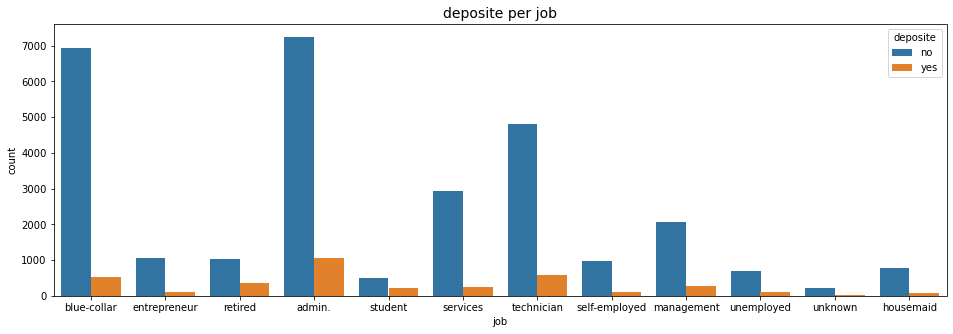

In [146]:
#Checking the tribution of age in the dataset
#Lets plot bar graph to visualise the distribution.

sns.countplot(data=df_train, x="job", hue="deposite")
plt.title('deposite per job', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

Lets have top 5 jobs from the data, the maximun people who participated work as admin, followed by people who work as blue-collars, the technicians at third position, people who work at services in number 4 and people who work in finance at number 5. Majority of people who have participated in this project have not subscribed for the deposite.

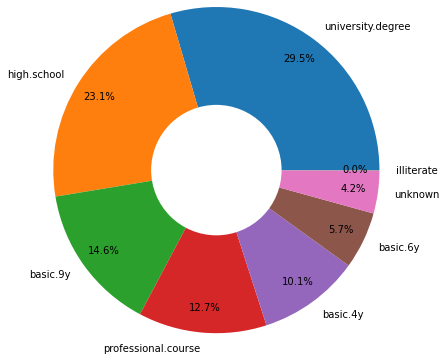

In [147]:
#Checking the tribution of Eductation in the dataset
#Lets plot a donut chart to visualise the distribution.

education_distribution = df_train['education'].value_counts().values
education = df_train['education'].value_counts().index
explode = (1.5, 1.5, 1.5, 1.5)
plt.pie(education_distribution, labels=education, autopct='%.1f%%',pctdistance=0.85, radius=1.5)
centre_circle = plt.Circle((0, 0), 0.60, fc = 'white')
fig =plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


From our data, the maximun number of people are holders of a university degree with 29.5% followed by people with high school diploma with 23.1%, the basic 9y at the third place with 14.6% , the professional course at the 4th place with 12.7%, the basic 4y at the 5th place with 10.1%, the basic 6y at 6th place with 5.7%, unknown at 7th place with 4.2% and lastly illiterate people with the minimum number of people with 0.0% .

The dadaset indicates that there is only few number of people who are illiterate, majority of people have basic education with the university graduates on the lead.

In [148]:
# Haiving a look at the distribution of education
education = df_train.groupby(df_train['education']).size().sort_values()
education.sort_values().head(3)

education
illiterate      16
unknown       1397
basic.6y      1865
dtype: int64

The least number of people who participated are iliterate with only 16 people, followed by unknown and basic 6y respectively.

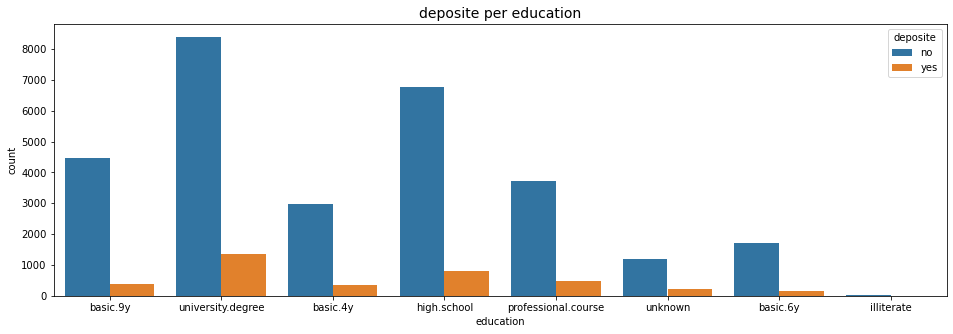

In [149]:
# Having a look at the relationship between the deposite and people's jobs

sns.countplot(data= df_train, x='education', hue="deposite")
plt.title('deposite per education', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

People who fall into illiterate group did not subscribe for the deposite, people in basic.6y and unknown have the least subscribers for the deposit while university graduates, high school diploma, professional course, basic 4y and 9y has most subscribers.

In [150]:
# Haiving a look at the distribution of age
age = df_train.groupby(df_train['age']).size().sort_values(ascending=False)
age.head(20)

age
31    1551
32    1474
33    1443
35    1417
34    1404
36    1402
30    1365
29    1171
37    1160
38    1139
39    1131
41    1031
40     945
42     915
45     871
43     827
44     826
46     823
28     799
48     775
dtype: int64

The top 20 ages that participated is between the agr of 31 and 48, the maximum number participats has the age of 31.

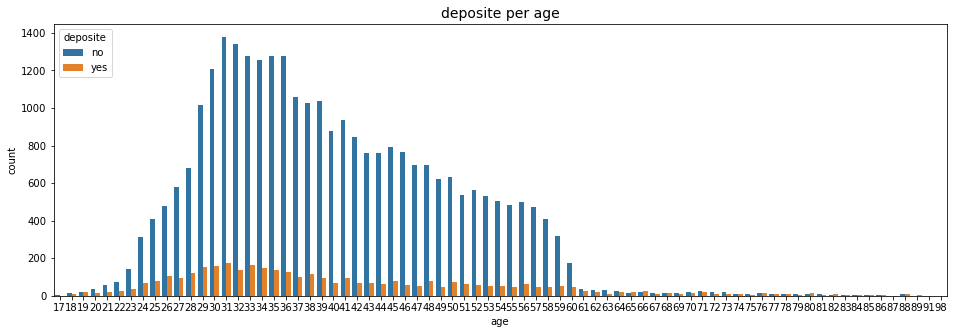

In [151]:
# Having a look at the relationship between the deposite and age
sns.countplot(data=df_train, x='age', hue="deposite")
plt.title('deposite per age', fontsize=14)
plt.rcParams['figure.figsize'] = (20, 5)

Majority of people participated are between the age of 24 and 60, people who mostly subscribed for the deposite are between the age of 24 and 48, people in their late 20s and early 30s have the highest number of subscribers.

In [152]:
# Haiving a look at the distribution of marital status
age = df_train.groupby(df_train['marital']).size().sort_values(ascending=False)
age.head(20)

marital
married     19953
single       9257
divorced     3675
unknown        65
dtype: int64

Married people has the maximum participants, followed by the single people, the least participants are unknown and devorce people.

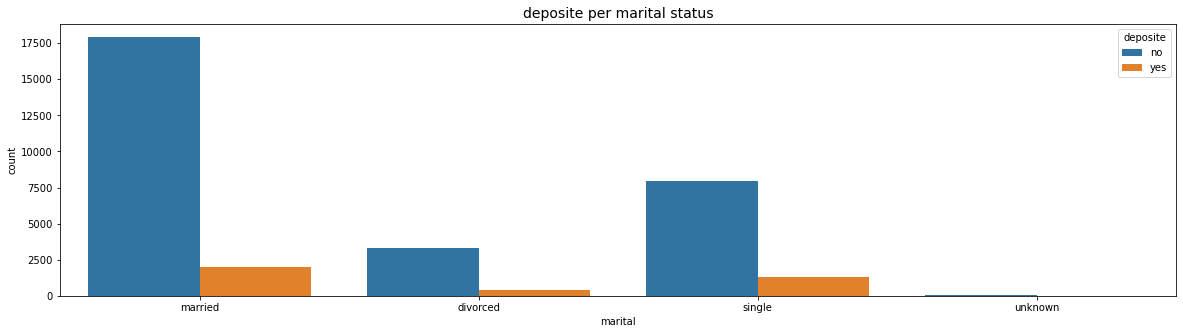

In [153]:
# Having a look at the relationship between the deposite and people's marital status
sns.countplot(data=df_train, x='marital', hue="deposite")
plt.title('deposite per marital status', fontsize=14)
plt.rcParams['figure.figsize'] = (15, 5)

Married and single people has the most subscribers of the deposite.

In [154]:
# Haiving a look at the distribution of days of the week
day_of_week = df_train.groupby(df_train['day_of_week']).size().sort_values(ascending=False)
day_of_week.head(20)


day_of_week
thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
dtype: int64

Maximum number of people participate on thursday and the least number of people participate on friday.

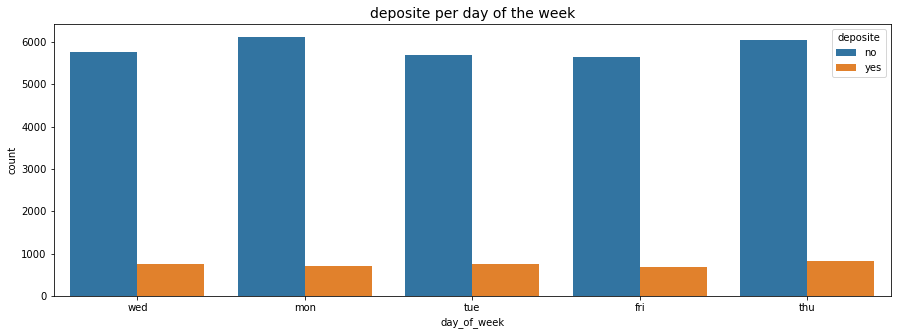

In [155]:
# Having a look at the relationship between the deposite and days of the week
sns.countplot(data=df_train, x='day_of_week', hue="deposite")
plt.title('deposite per day of the week', fontsize=14)
plt.rcParams['figure.figsize'] = (15, 5)

From visualisation we can see that there is a little difference amoungs the days throughout the week however, Thursday is leading on the number of subscribers.

In [156]:
# Haiving a look at the distribution of months
month = df_train.groupby(df_train['month']).size().sort_values(ascending=False)
month.head(6)

month
may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
dtype: int64

From the top 6 months, may has the maximum number of participants and april has the least number of participants.

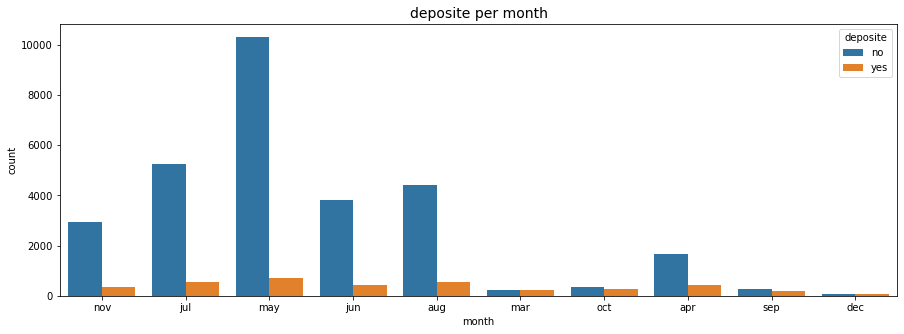

In [157]:
# Having a look at the relationship between the deposite and days of the week
sns.countplot(data=df_train, x='month', hue="deposite")
plt.title('deposite per month', fontsize=14)
plt.rcParams['figure.figsize'] = (15, 5)

The month May has the highest subscribers then followed by August, July, June and April in that order.

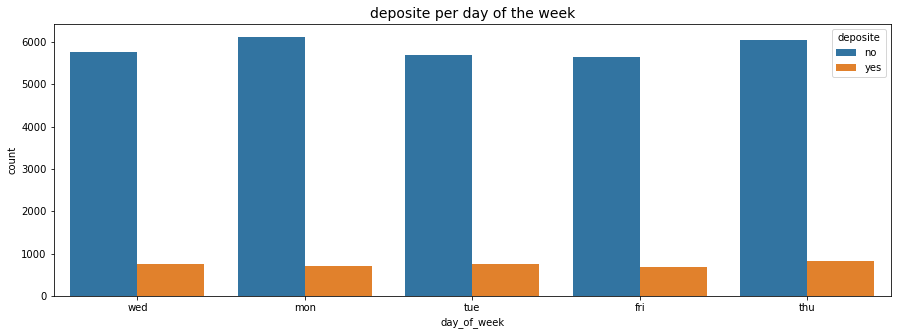

In [158]:
sns.countplot(data=df_train, x='day_of_week', hue="deposite")
plt.title('deposite per day of the week', fontsize=14)
plt.rcParams['figure.figsize'] = (15, 5)

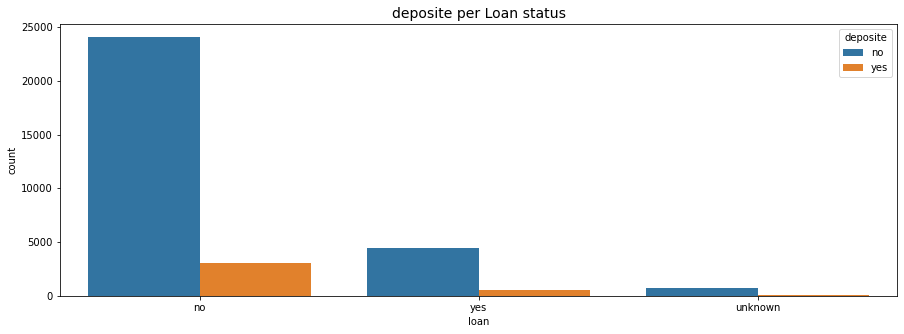

In [159]:
sns.countplot(data=df_train, x= 'loan', hue="deposite")
plt.title('deposite per Loan status', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

Majority of people who participated and subscribed for the long-term deposite do not have loans

In [160]:
house = df_train.groupby(df_train['housing']).size().sort_values(ascending=False)
house.head(6)

housing
yes        17254
no         14900
unknown      796
dtype: int64

Both people with and without housing participated, they both subcribe to the lon-term investment with the people having housing leading with 2354 more sunscribers.

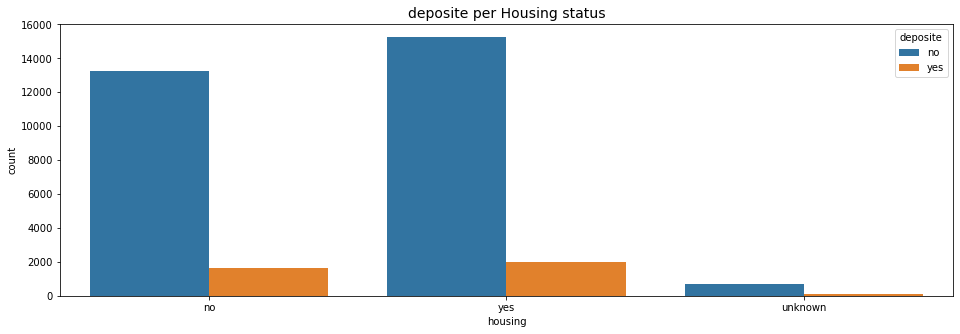

In [161]:
sns.countplot(data=df_train, x= 'housing', hue="deposite")
plt.title('deposite per Housing status', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

The difference between subcribers with housing and without housing is minor

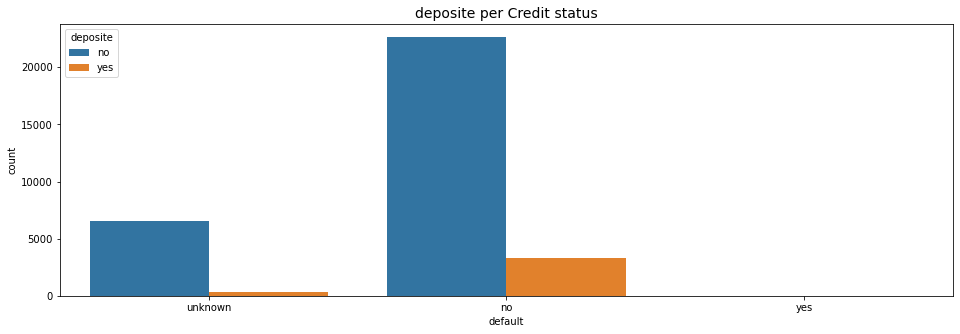

In [162]:
sns.countplot(data=df_train, x= 'default', hue="deposite")
plt.title('deposite per Credit status', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

Majority of people who subscribed do not have default credit followed by unknown status.

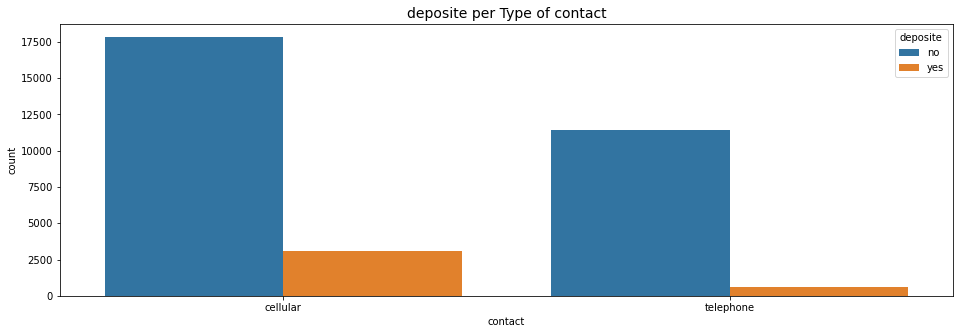

In [163]:
sns.countplot(data=df_train, x= 'contact', hue="deposite")
plt.title('deposite per Type of contact', fontsize=14)
plt.rcParams['figure.figsize'] = (16, 5)

# Pre-processing


In [164]:
#Changing categorical values to numeric values using label encoder
# Import label encoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Separating Int and object column
object_list = df_train.select_dtypes(include = 'object')
int64list =  df_train.select_dtypes(include = 'int64')

# Fitting label encoder
df_train_f = object_list.apply(label_encoder.fit_transform)

#checking the results of our label encoder
df_train_f.head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposite
0,1,1,2,1,0,0,0,7,4,1,0
1,2,1,6,0,0,0,1,7,4,0,0
2,5,1,0,0,0,0,0,3,1,1,1
3,0,1,6,0,2,0,1,6,1,1,0
4,5,0,6,0,0,0,0,4,3,1,0


In [165]:
# merging the converted dataframes to have one dataframe with only numerical values
df_final= df_train_f.merge(int64list,  left_index=True, right_index=True)
df_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposite,age,duration,campaign,pdays,previous
0,1,1,2,1,0,0,0,7,4,1,0,49,227,4,999,0
1,2,1,6,0,0,0,1,7,4,0,0,37,202,2,999,1
2,5,1,0,0,0,0,0,3,1,1,1,78,1148,1,999,0
3,0,1,6,0,2,0,1,6,1,1,0,36,120,2,999,0
4,5,0,6,0,0,0,0,4,3,1,0,59,368,2,999,0


## Feature Selection

### Heat map

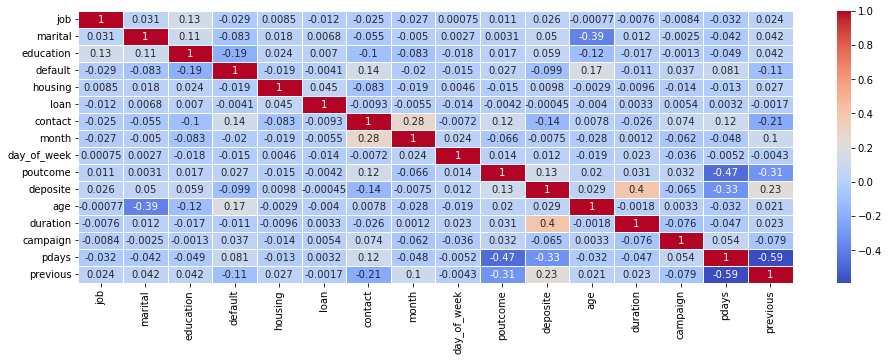

In [166]:
# Having alook at the correlation of features
# plotting the heatmap
hm = sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True, linewidth=0.7)
# displaying the plotted heatmap
plt.show()

The heat map shows high negetive correlation between 'Previous' and 'pdays' features, we have to drop the features to increase the accuracy of our algorithm.

In [167]:
# Dropping irrelevant columns
df_final1 =df_final.drop(['previous', 'pdays'], axis=1)
df_final1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposite,age,duration,campaign
0,1,1,2,1,0,0,0,7,4,1,0,49,227,4
1,2,1,6,0,0,0,1,7,4,0,0,37,202,2
2,5,1,0,0,0,0,0,3,1,1,1,78,1148,1
3,0,1,6,0,2,0,1,6,1,1,0,36,120,2
4,5,0,6,0,0,0,0,4,3,1,0,59,368,2


### TRAIN - TEST SPLIT

In [168]:
# Train test splitting
# Importing train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_final1.drop(['deposite'], axis=1)
Y = df_final1['deposite']

#Setting the train test ratio and assiging X,y(train, test) values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Normalising the data
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Model Selection
In this section we will have a look at train different models and compare performance to select the best performing model.

In [ ]:
names = ['Logistic Regression', 'Random Forest','Nearest Neighbors'
         ]

In [ ]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    KNeighborsClassifier(5), 
]

In [ ]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_scaled_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_scaled_train)
    y_pred_test = clf.predict(X_scaled_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
... All done!


In [ ]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Nearest Neighbors,0.921131,0.742643,0.440753,0.553191,0.400000,0.075835
Logistic Regression,0.899014,0.622159,0.225000,0.330483,0.327409,0.035240
Random Forest,0.889605,1.000000,0.003425,0.006826,0.007547,0.585027


<AxesSubplot:xlabel='Classifier'>

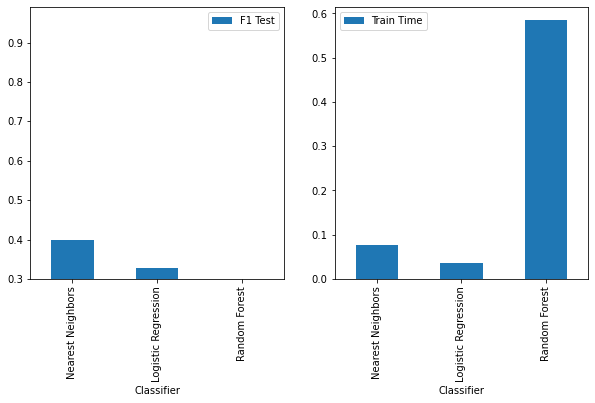

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.3,0.99])
results.plot(y='Train Time', kind='bar', ax=ax[1])